In [79]:
import pandas as pd
import soccerdata as sd
from soccerdata import MatchHistory

In [80]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

In [81]:
df_final = pd.read_csv("/Users/christianhellum/Cand. Merc./Data-Science-Project/data_science_project/Beat the bookies/data/Football_data_final_final.csv")

In [62]:
df_final.shape
df_final.columns

Index(['Wk', 'Day', 'Date', 'Time', 'Home', 'Away', 'FTR', 'Attendance',
       'B365H', 'B365D', 'B365A', 'AttackStrengthHome', 'AttackStrengthAway',
       'DefenseWeaknessHome', 'DefenseWeaknessAway', 'Season', 'AvgHomePoints',
       'AvgAwayPoints', 'AvgLosingHomePoints', 'AvgLosingAwayPoints',
       'AvgGoalDiffHome', 'AvgGoalDiffAway', 'HomeWinsRatio', 'HomeDrawsRatio',
       'AwayWinsRatio', 'AwayDrawsRatio', 'AvgHomeCornersLast5',
       'AvgAwayCornersLast5', 'AvgHomeShotsLast5', 'AvgHomeShotsOnTargetLast5',
       'AvgAwayShotsLast5', 'AvgAwayShotsOnTargetLast5', 'elo', 'elo_away',
       'FormHomeTeam', 'FormAwayTeam', 'ProbabilityDraw', 'ProbabilityHomeWin',
       'ProbabilityAwayWin'],
      dtype='object')

In [63]:
df_final.head()

,Wk,Day,Date,Time,Home,Away,FTR,Attendance,B365H,B365D,...,AvgHomeShotsOnTargetLast5,AvgAwayShotsLast5,AvgAwayShotsOnTargetLast5,elo,elo_away,FormHomeTeam,FormAwayTeam,ProbabilityDraw,ProbabilityHomeWin,ProbabilityAwayWin
0,1.0,Fri,2019-08-16,20:00,Athletic Club,Barcelona,H,47693.0,5.25,3.80,...,0.0,0.0,0.0,1722.019409,2001.228638,0.0,0.0,0.226260,0.127955,0.645785
1,1.0,Sat,2019-08-17,16:00,Celta Vigo,Real Madrid,A,23566.0,4.75,4.20,...,0.0,0.0,0.0,1681.163452,1841.848999,0.0,0.0,0.239320,0.266267,0.494412
2,1.0,Sat,2019-08-17,18:00,Valencia,Real Sociedad,D,41846.0,1.66,3.75,...,0.0,0.0,0.0,1813.655029,1719.431152,0.0,0.0,0.229859,0.616701,0.153439
3,1.0,Sat,2019-08-17,19:00,Mallorca,Eibar,H,15127.0,2.80,3.20,...,0.0,0.0,0.0,1566.961060,1712.778198,0.0,0.0,0.240204,0.286297,0.473499
4,1.0,Sat,2019-08-17,20:00,Leganés,Osasuna,A,10020.0,2.00,3.20,...,0.0,0.0,0.0,1670.794800,1641.649048,0.0,0.0,0.237143,0.533531,0.229326


In [64]:
df_final["FTR"].value_counts()

H    831
A    520
D    509
Name: FTR, dtype: int64

In [65]:
def home_away_results(df_final: pd.DataFrame):
    """Returns aggregated home/away results per team"""

    res = (
        pd.melt(df_final.reset_index(),
                id_vars=['Date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['Home', 'Away']))

    res.is_home = res.is_home.replace(['home_team', 'away_team'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [66]:
results = home_away_results(df_final)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team          is_home                                                     
Alavés        Away        10  0.135135      48  0.648649      16  0.216216
              Home        28  0.378378      27  0.364865      19  0.256757
Almería       Away         3  0.083333      25  0.694444       8  0.222222
              Home        10  0.277778      15  0.416667      11  0.305556
Athletic Club Away        23  0.247312      35  0.376344      35  0.376344
              Home        46  0.494624      25  0.268817      22  0.236559

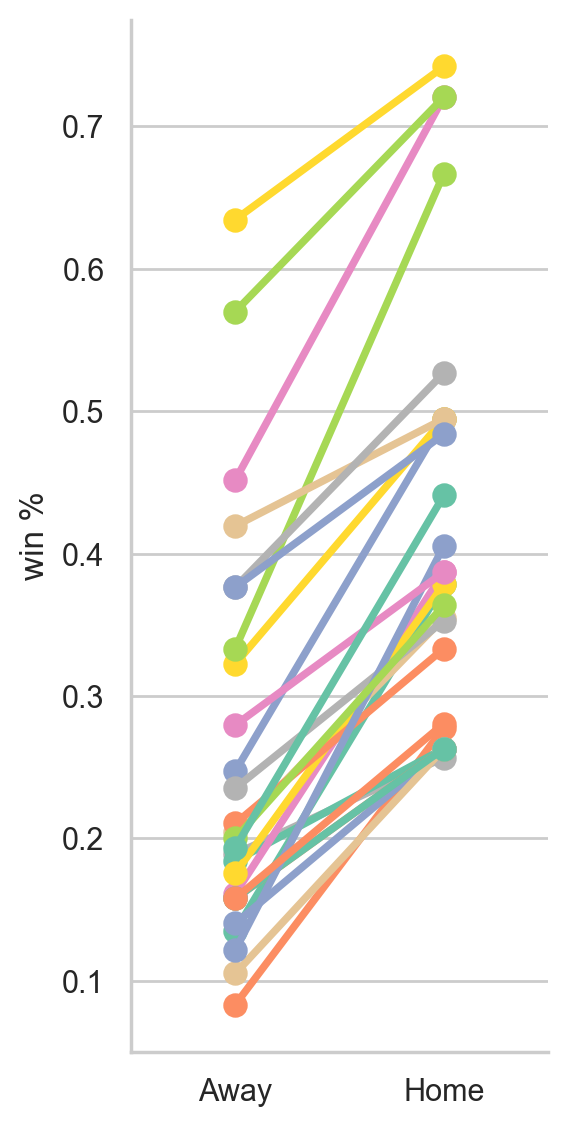

In [67]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette='Set2', height=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', order=["Away", "Home"])
g.set_axis_labels('', 'win %');

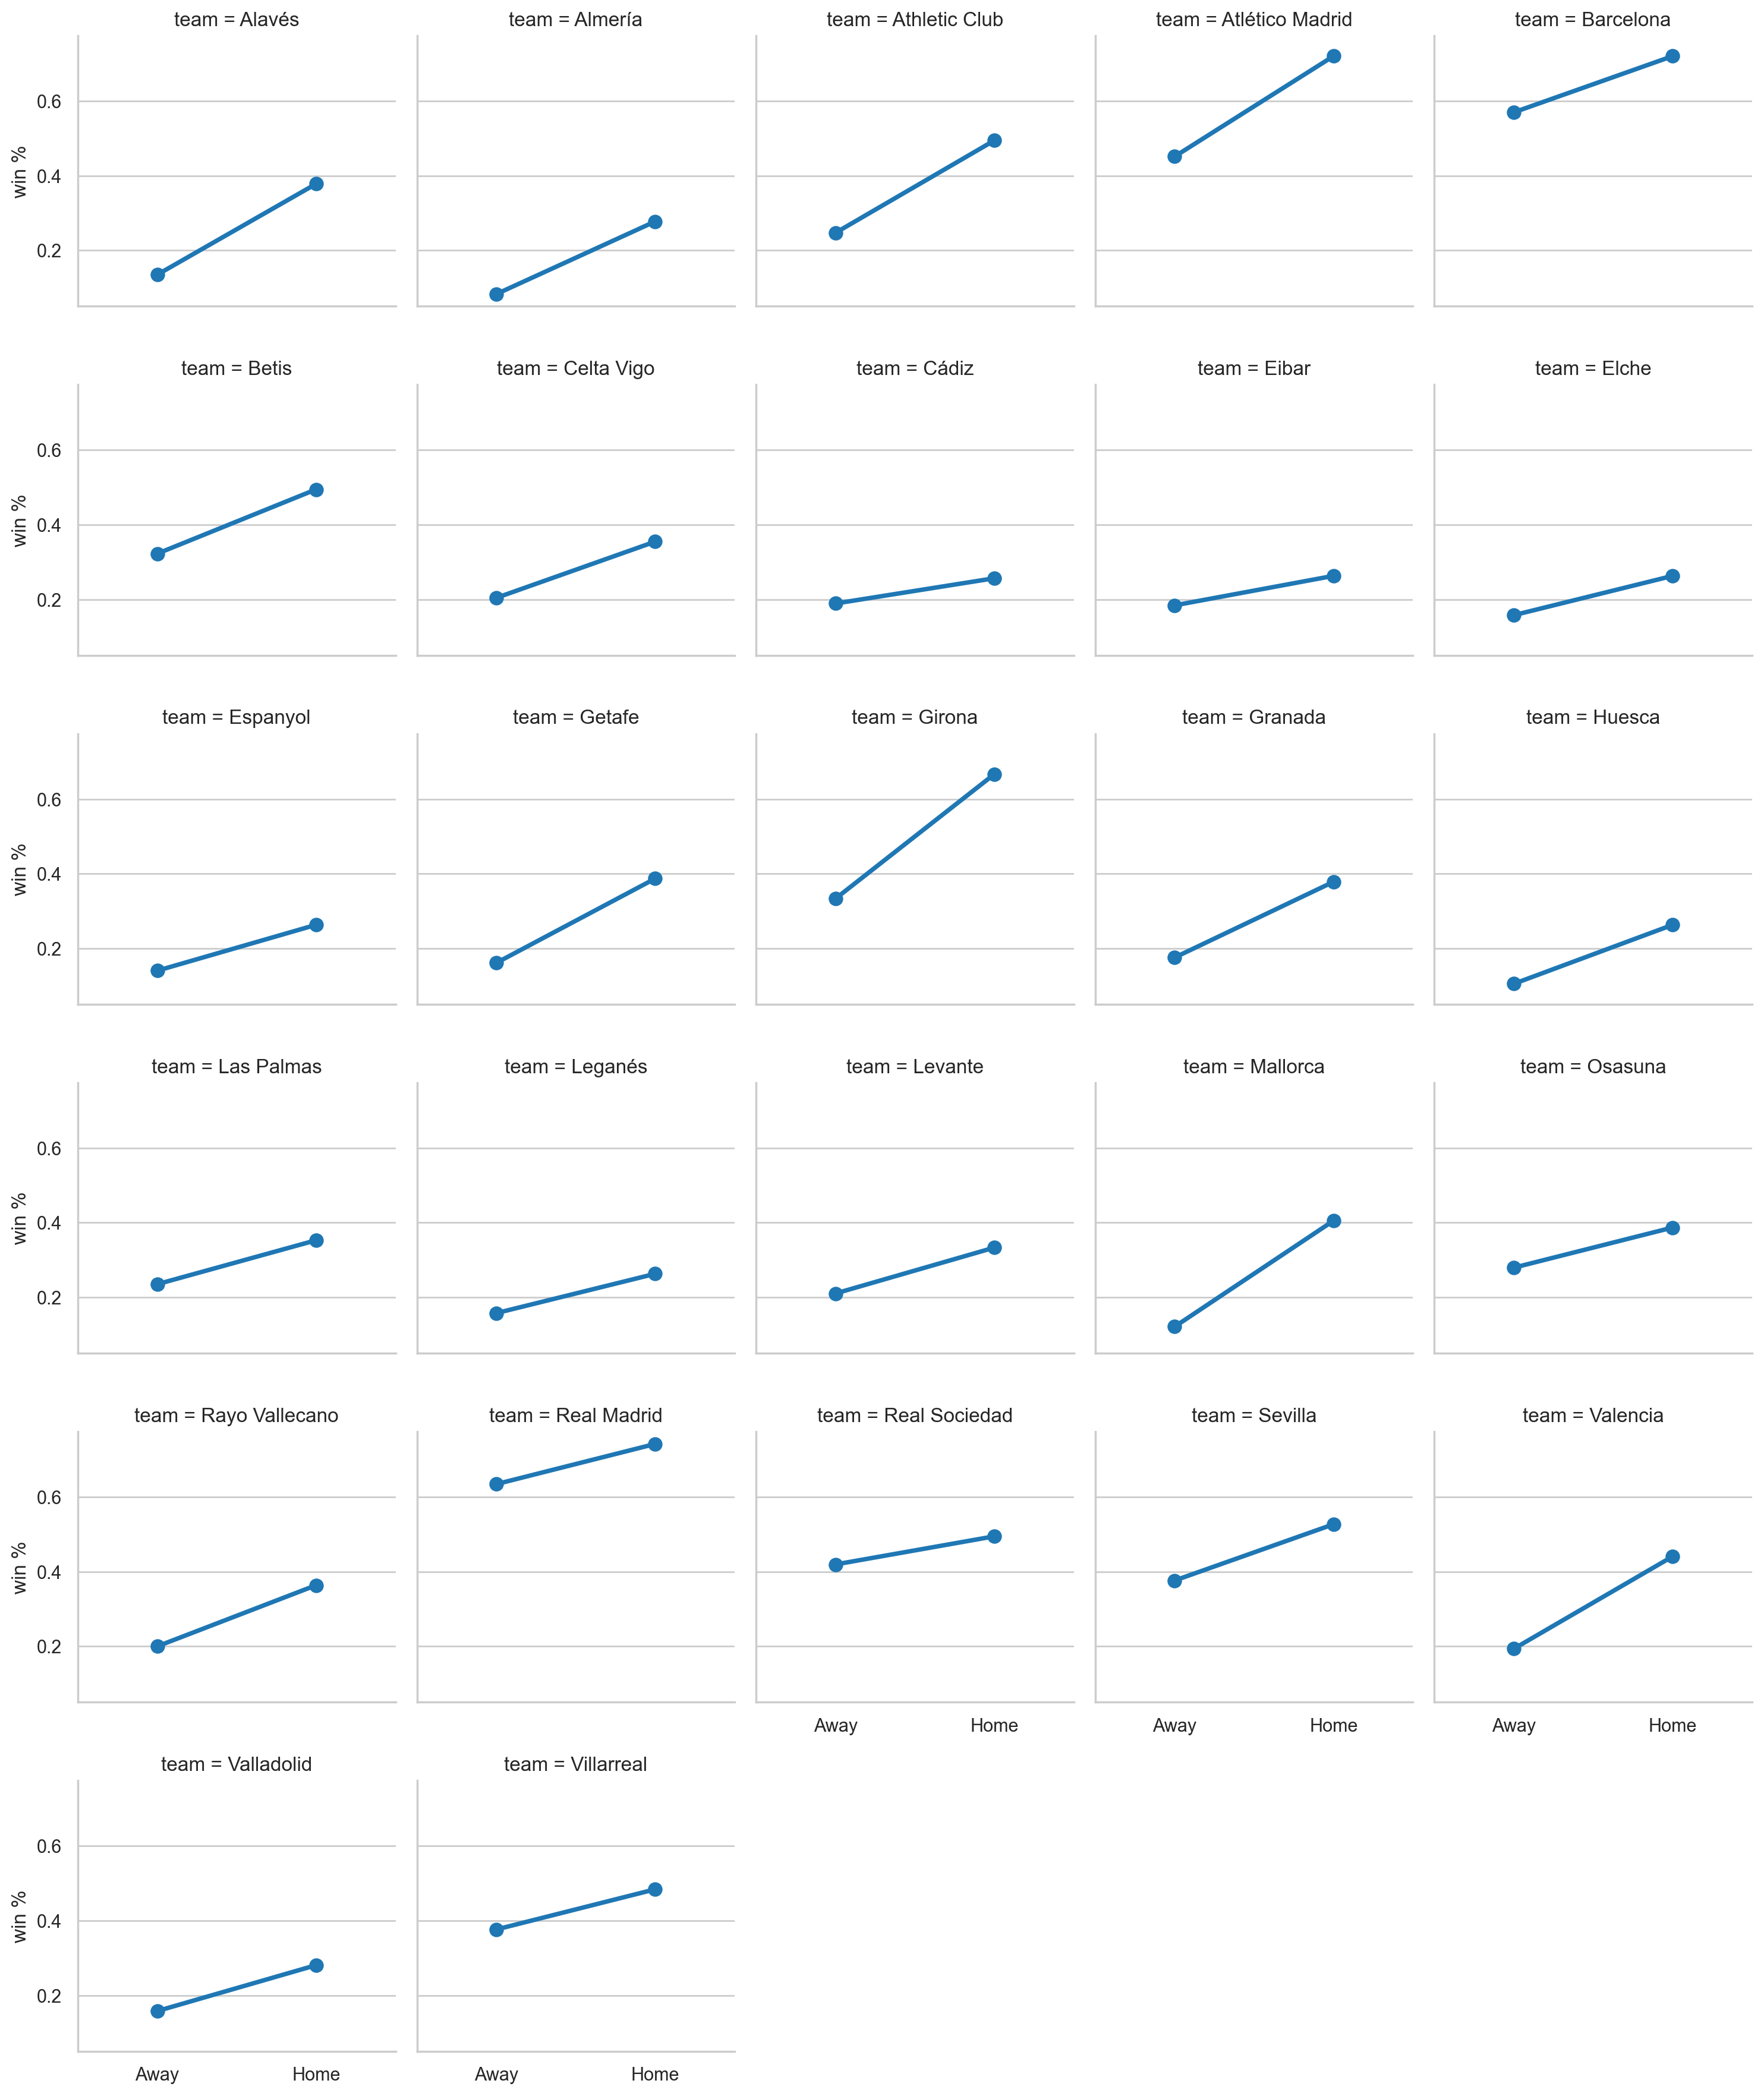

In [68]:
g = sns.FacetGrid(results.reset_index(), col='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct', order=["Away", "Home"])
g.set_axis_labels('', 'win %');

In [73]:
summary_stats = df_final.describe()

In [74]:
summary_stats = summary_stats.drop(['25%', '50%', '75%'])

In [75]:
summary_stats.T

,count,mean,std,min,max
Wk,1860.0,19.134409,10.794585,1.000000,38.000000
Attendance,1860.0,27344.768185,17962.097714,13.000000,95745.000000
B365H,1860.0,2.615581,1.392970,1.080000,13.000000
B365D,1860.0,3.760758,0.955110,2.750000,11.000000
B365A,1860.0,4.277468,2.851064,1.180000,26.000000
AttackStrengthHome,1860.0,0.044351,0.024910,0.000000,0.235294
AttackStrengthAway,1860.0,0.044675,0.026987,0.000000,0.368421
DefenseWeaknessHome,1860.0,0.044482,0.025009,0.000000,0.363636
DefenseWeaknessAway,1860.0,0.043821,0.022513,0.000000,0.200000
AvgHomePoints,1860.0,1.488284,0.766632,0.000000,3.000000


In [76]:
targetData = df_final['FTR'].replace({'H':1,'D':0,'A':-1})

In [77]:
corr_data = df_final[['B365H', 'B365D', 'B365A',
       'AvgHomePoints', 'AvgAwayPoints', 'AvgGoalDiffHome', 'AvgGoalDiffAway', 'AwayDrawsRatio', 'AvgHomeShotsLast5',
       'AvgHomeShotsOnTargetLast5', 'AvgAwayShotsLast5',
       'AvgAwayShotsOnTargetLast5', 'elo', 'elo_away', 'FormHomeTeam',
       'FormAwayTeam', 'ProbabilityHomeWin', 'ProbabilityAwayWin']]

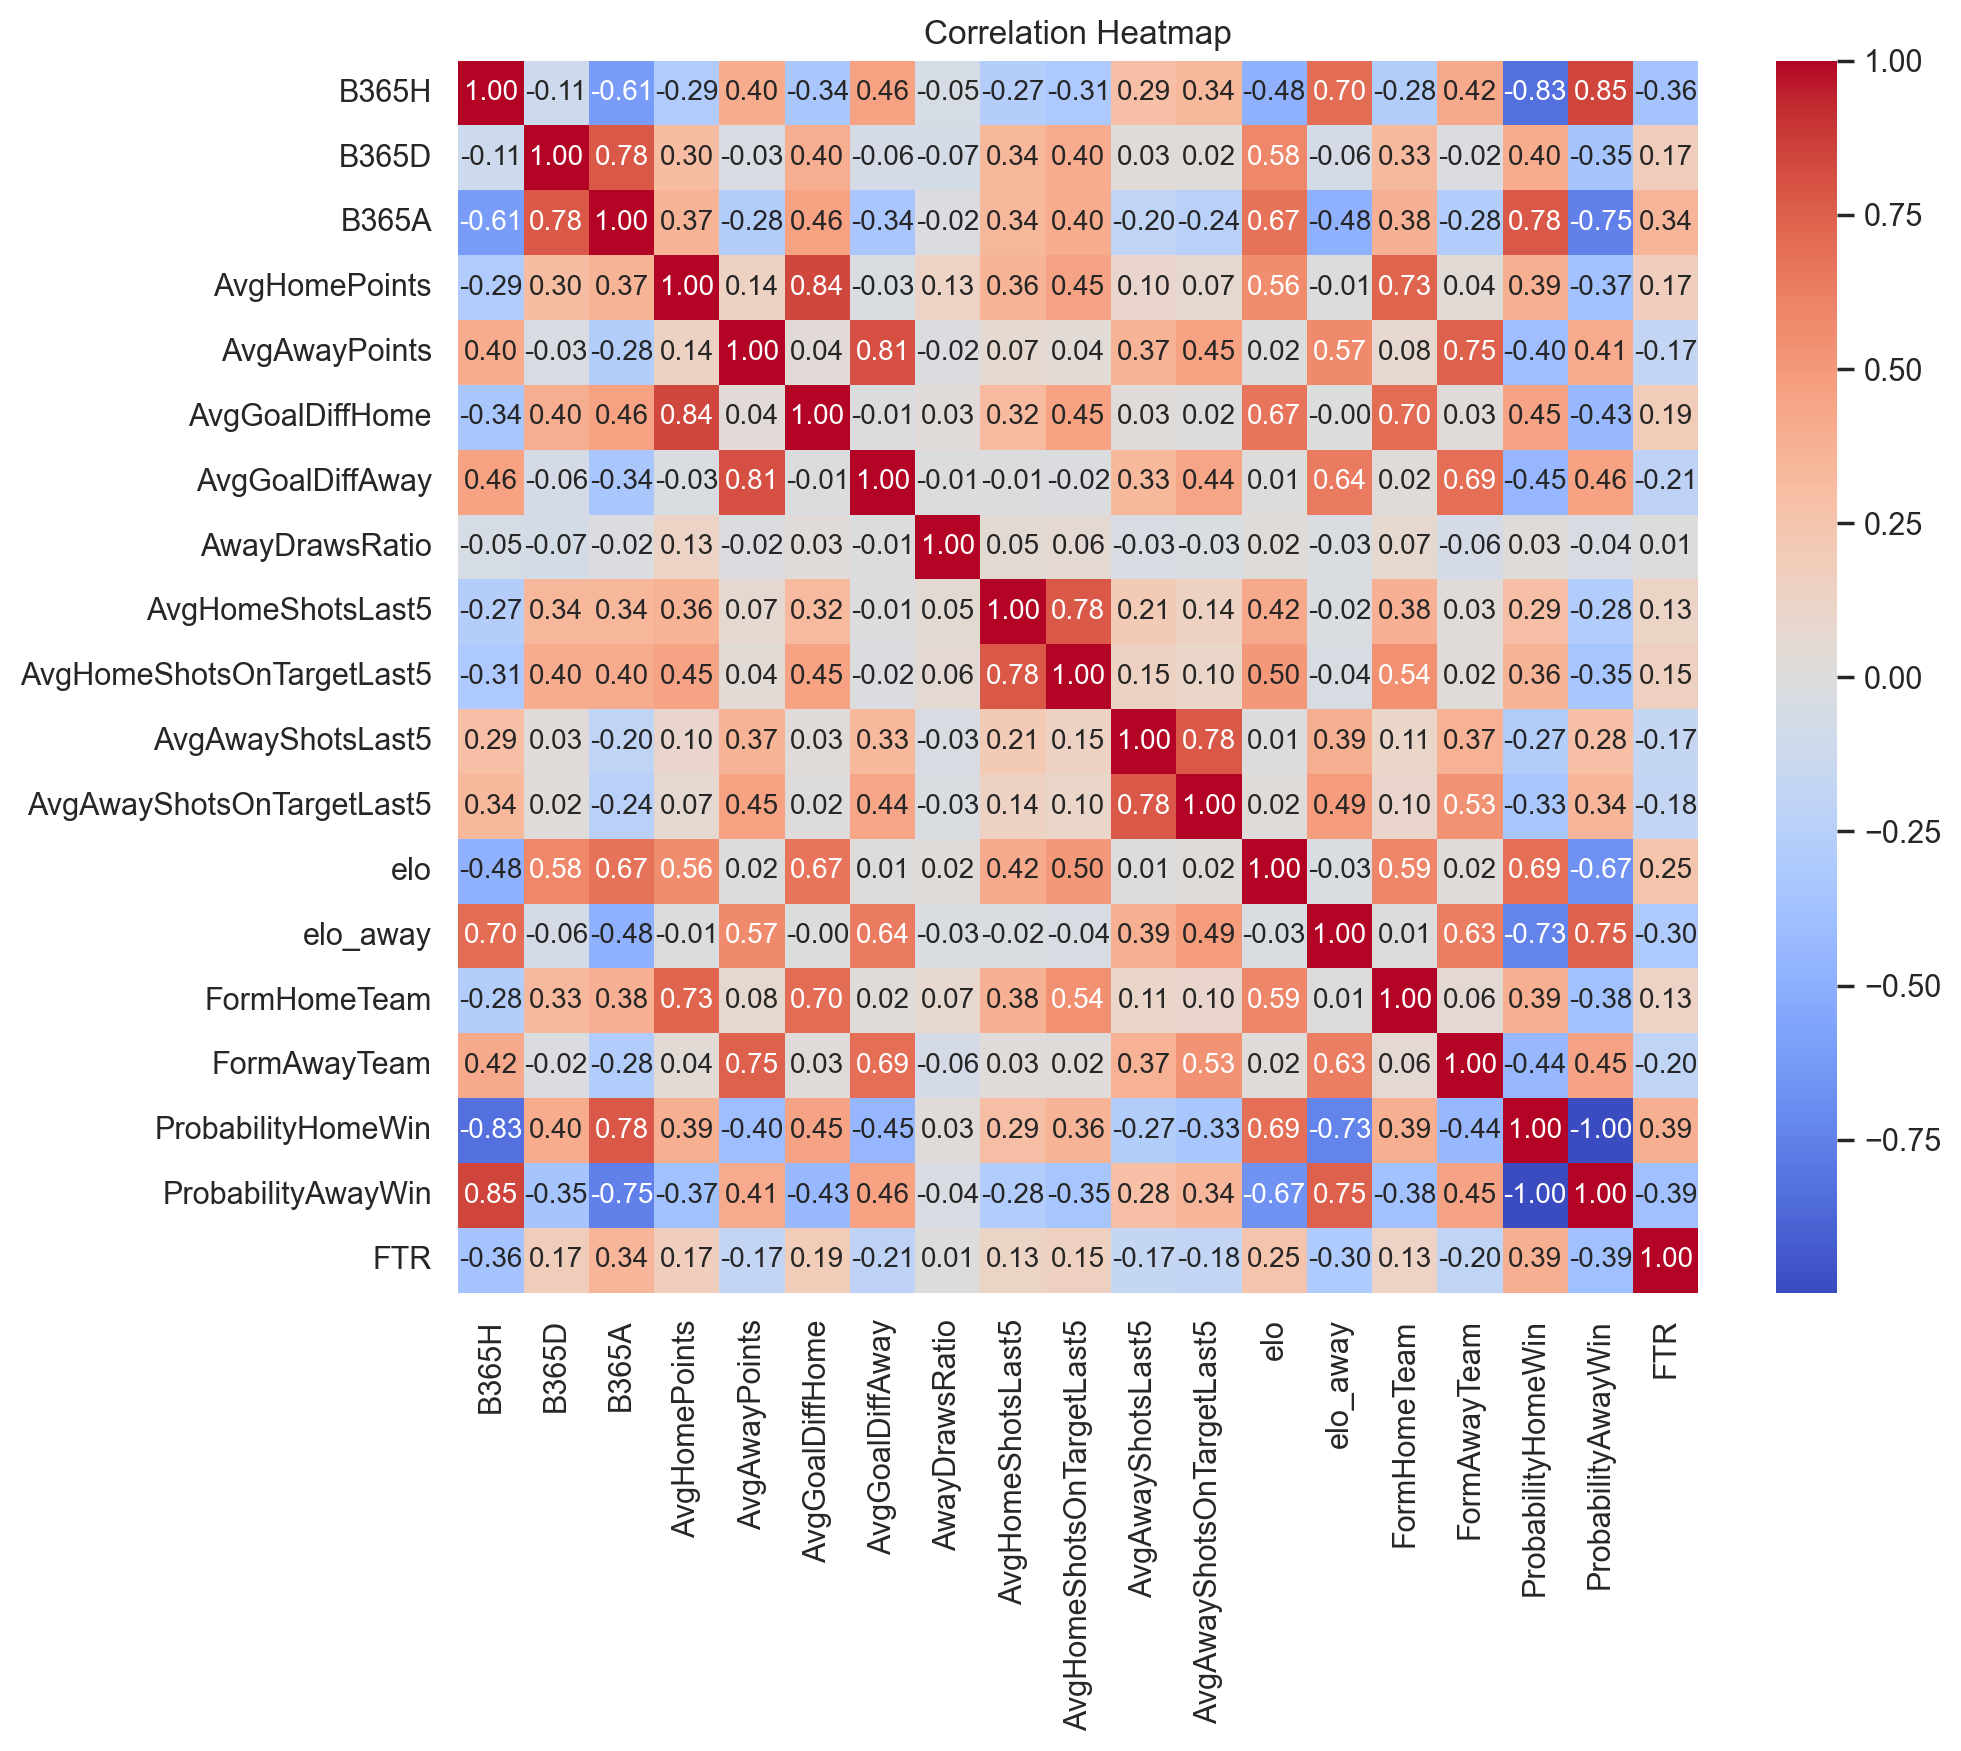

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming prev_5_data is a DataFrame containing the features
# and targetData is a Series containing the target variable

# Concatenate the features and target variable into a single DataFrame
combined_data = pd.concat([corr_data, targetData], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()

In [83]:
df_final.to_csv("df_final.csv")